<a href="https://colab.research.google.com/github/seymatttass/MachineLearningExamples/blob/main/ML2_RidgeReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)
ridge_model


Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5    # çeşitli lambda değerleri

In [ ]:
ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train,y_train)
  katsayilar.append(ridge_model.coef_)

Text(0.5, 1.0, 'Düzenlileştirmenin bir fonksiyonu olarak ridge katsayıları')

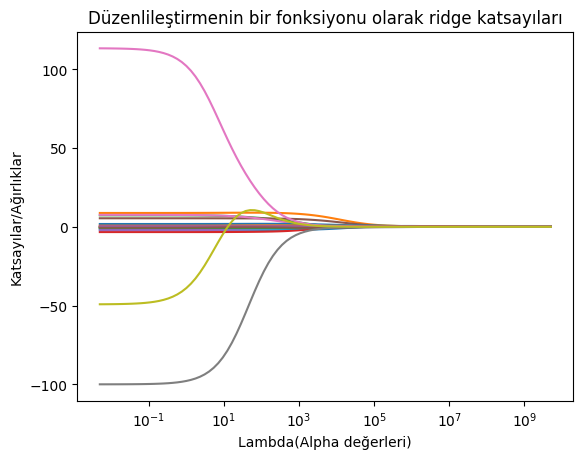

In [ ]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale('log')
plt.xlabel("Lambda(Alpha değerleri)")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin bir fonksiyonu olarak ridge katsayıları")

In [ ]:
# TAHMİN

y_pred = ridge_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828446

In [ ]:
# MODEL TUNİNG

lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lambdalar,
                   scoring="neg_mean_squared_error")

ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_

2018508.6292982749

In [ ]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train,y_train)

np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

387.66724377389795